# Histogramas de salario

Notebook para visualizar la distribución de `ConvertedCompYearly` y de `log_salary = log(1 + salary)`.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", "{:,.2f}".format)

df = pd.read_csv("../data/processed/df_final_v1.csv")
df[["ConvertedCompYearly", "log_salary"]].describe()

,ConvertedCompYearly,log_salary
count,"23,435.00","23,435.00"
mean,"86,155.29",10.79
std,"186,756.97",1.40
min,1.00,0.69
25%,"32,712.00",10.40
50%,"65,000.00",11.08
75%,"107,971.50",11.59
max,"16,256,603.00",16.60


## Histograma salario original

Distribución de `ConvertedCompYearly` mostrando la asimetría positiva y las colas largas. El eje X parte de 0; si hay outliers muy altos puedes añadir `plt.xlim(0, 300_000)` o usar escala log.

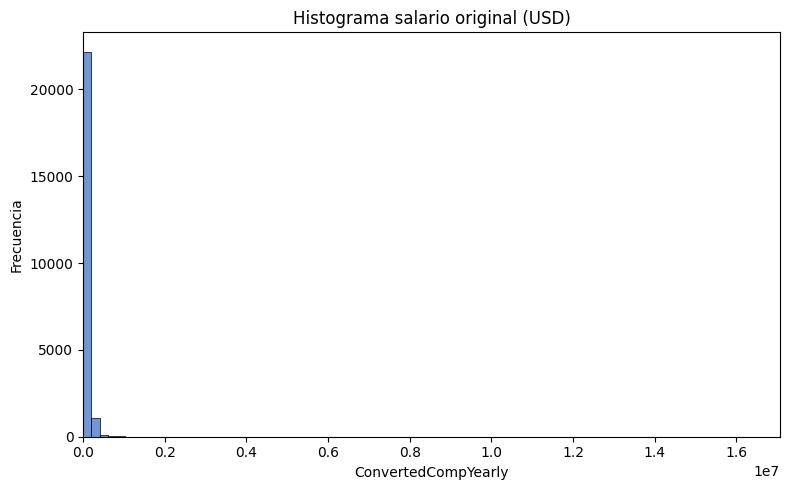

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df["ConvertedCompYearly"].dropna(), bins=80, color="#4472c4")
plt.title("Histograma salario original (USD)")
plt.xlabel("ConvertedCompYearly")
plt.ylabel("Frecuencia")
plt.xlim(left=0)
plt.savefig("histograma_salario_original.png", dpi=150, bbox_inches="tight")
plt.tight_layout()
plt.show()

## Histograma log_salary

Distribución de `log_salary = log(1 + salary)` mostrando la aproximación a normalidad tras la transformación logarítmica.

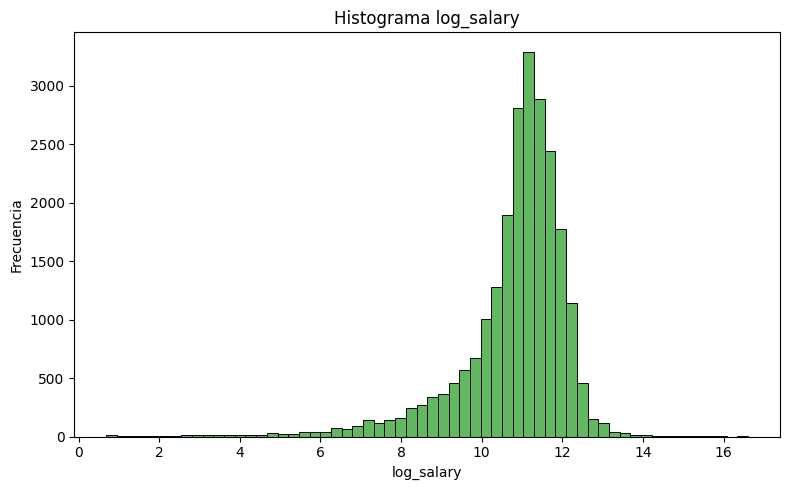

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df["log_salary"].dropna(), bins=60, color="#2ca02c")
plt.title("Histograma log_salary")
plt.xlabel("log_salary")
plt.ylabel("Frecuencia")
plt.savefig("histograma_log_salary.png", dpi=150, bbox_inches="tight")
plt.tight_layout()
plt.show()

### Lectura técnica de los histogramas

- **Salario original (`ConvertedCompYearly`)**: se observa una distribución fuertemente asimétrica a la derecha (cola larga). La mayoría de observaciones cae en el tramo bajo/medio (decenas a cientos de miles) y un conjunto pequeño de outliers se extiende hasta valores multimillonarios, lo que comprime el histograma a la izquierda. La varianza es elevada y la escala lineal hace visibles los picos iniciales pero oculta detalle en la cola.
- **Salario transformado (`log_salary = log(1 + salary)`)**: la transformación logarítmica reescala multiplicativos a aditivos, reduce la asimetría y atenúa el peso de outliers. El histograma resultante se aproxima más a una forma unimodal y casi simétrica, con dispersión más homogénea; esto facilita supuestos de normalidad aproximada y homocedasticidad en modelos.
- **Por qué se ven así**: salarios anuales suelen seguir distribuciones tipo log-normal (crecimiento multiplicativo y límites inferiores cercanos a cero), de ahí la cola derecha en la escala original. El log comprime esa cola y estabiliza la varianza, haciendo más evidente la concentración central y mitigando la influencia de valores extremos.